In [53]:
# importing packages
import datetime as dt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# RFM for Online Retail

**Background**

Contoso is an online retail store based in the UK, and it has grown to become one of the leading shopping platforms serving customers across various countries. Since its establishment, Contoso has been committed to offering a wide range of high-quality products, including the latest technology, fashionable clothing, and everyday essentials. With a strong focus on providing convenience and an exceptional online shopping experience, Contoso has built a reputation as a reliable shopping destination for consumers from all walks of life.

With a diverse product catalog, Contoso offers a wide selection ranging from cutting-edge electronics, home appliances, lifestyle accessories, clothing, to health and beauty products. The store continually updates its collection to ensure customers always have access to the latest and best products available in the market.

Support for various payment methods, fast shipping, and an easy return policy make shopping at Contoso a satisfying experience. Not only in the UK, Contoso also serves international customers by offering global shipping and customer support in multiple languages.

Customers can easily navigate the user-friendly Contoso website, which makes it simple to find desired products, along with attractive offers such as discounts, seasonal promotions, and product bundles. With a mission to reach more customers worldwide, Contoso continues to expand its market reach and innovate to meet the ever-evolving shopping needs.

**Problem Statement**

- Contoso aims to enhance its marketing strategies and improve customer retention by gaining a deeper understanding of its customer base in UK.
- To achieve this, the stakeholders at Contoso want to perform an RFM (Recency, Frequency, Monetary) analysis. This analysis will allow Contoso to identify customer segments with an emphasis on recency to induce higher repeat purchase


**Objective of Analysis**

1.	Enhance Marketing Strategies: Utilize the insights gained from the RFM analysis to refine and enhance Contoso's marketing strategies, ensuring they are more targeted and effective.
2.	Improve Customer Loyalty: Identify key customer segments that could potentially be upgraded to higher tier of loyalty
3.	Provide Actionable Insights: Generate actionable insights that can help Contoso make data-driven decisions to optimize overall business performance and customer satisfaction.


In [2]:
# import the dataset
excel_df1 = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2009-2010', parse_dates=['InvoiceDate'])
excel_df2 = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2010-2011', parse_dates=['InvoiceDate'])

print(f"The number of rows for excel_df1 is {excel_df1.shape[0]} and the number of columns for excel_df1 is {excel_df1.shape[1]} columns.")
print(f"The number of rows for excel_df2 is {excel_df2.shape[0]} and the number of columns for excel_df2 is {excel_df2.shape[1]} columns.")

The number of rows for excel_df1 is 525461 and the number of columns for excel_df1 is 8 columns.
The number of rows for excel_df2 is 541910 and the number of columns for excel_df2 is 8 columns.


In [26]:
df = pd.concat([excel_df1, excel_df2], axis=0, join='inner')
display(df.head())

print(f"The numbers of rows and columns for the combined dataframe are {df.shape[0]} rows and {df.shape[1]} columns.")

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,497946,37410,BLACK AND WHITE PAISLEY FLOWER MUG,19152,2010-02-15 11:57:00,0.1,13902.0,Denmark
1,501534,21099,SET/6 STRAWBERRY PAPER CUPS,12960,2010-03-17 13:09:00,0.1,13902.0,Denmark
2,501534,21091,SET/6 WOODLAND PAPER PLATES,12960,2010-03-17 13:09:00,0.1,13902.0,Denmark
3,501534,21085,SET/6 WOODLAND PAPER CUPS,12744,2010-03-17 13:09:00,0.1,13902.0,Denmark
4,501534,21092,SET/6 STRAWBERRY PAPER PLATES,12480,2010-03-17 13:09:00,0.1,13902.0,Denmark


The numbers of rows and columns for the combined dataframe are 1067371 rows and 8 columns.


In [27]:
# check for missing column
df.isna().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [28]:
df.dropna(inplace = True)
df.isna().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [29]:
# check for duplicated value
print(f'There are {df.duplicated().sum()} rows with duplicated values')

# filter out duplicated value
df.drop_duplicates(inplace=True)
print(f'There are now {df.duplicated().sum()} duplicated rows on the dataframe.')

There are 26479 rows with duplicated values
There are now 0 duplicated rows on the dataframe.


In [30]:
# revert customer id column into int to eliminate decimal
df['Customer ID'] = df['Customer ID'].astype('int')

# converting some columns into categorical data
for col in ['Invoice', 'StockCode', 'Country', 'Customer ID', 'Description']:
    df[col] = df[col].astype('str')

# displaying columns info
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 797885 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      797885 non-null  object        
 1   StockCode    797885 non-null  object        
 2   Description  797885 non-null  object        
 3   Quantity     797885 non-null  int64         
 4   InvoiceDate  797885 non-null  datetime64[ns]
 5   Price        797885 non-null  float64       
 6   Customer ID  797885 non-null  object        
 7   Country      797885 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 54.8+ MB


None

In [31]:
# check the stats of numerical columns
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,797885.0,12.60298,-80995.0,2.0,5.0,12.0,80995.0,191.670371
InvoiceDate,797885,2011-01-02 13:17:34.141160448,2009-12-01 07:45:00,2010-07-02 09:47:00,2010-12-02 12:33:00,2011-07-31 15:50:00,2011-12-09 12:50:00,NaN
Price,797885.0,3.702732,0.0,1.25,1.95,3.75,38970.0,71.392549


In [32]:
# filter out invoice which contains C as it indicates return invoices
df = df[~df["Invoice"].str.contains("C", na = False)]

In [33]:
# checking the quantity column for validation
df.describe()['Quantity']

count    779495.000000
mean         13.507085
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max       80995.000000
std         146.540284
Name: Quantity, dtype: float64

In [34]:
# create total_sales column to calculate the total amount for each order
df['total_sales'] = df['Quantity'] * df['Price']
display(df.head())
display(df.describe()[['Quantity', 'InvoiceDate', 'total_sales']].T)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,total_sales
0,497946,37410,BLACK AND WHITE PAISLEY FLOWER MUG,19152,2010-02-15 11:57:00,0.1,13902,Denmark,1915.2
1,501534,21099,SET/6 STRAWBERRY PAPER CUPS,12960,2010-03-17 13:09:00,0.1,13902,Denmark,1296.0
2,501534,21091,SET/6 WOODLAND PAPER PLATES,12960,2010-03-17 13:09:00,0.1,13902,Denmark,1296.0
3,501534,21085,SET/6 WOODLAND PAPER CUPS,12744,2010-03-17 13:09:00,0.1,13902,Denmark,1274.4
4,501534,21092,SET/6 STRAWBERRY PAPER PLATES,12480,2010-03-17 13:09:00,0.1,13902,Denmark,1248.0


,count,mean,min,25%,50%,75%,max,std
Quantity,779495.0,13.507085,1.0,2.0,6.0,12.0,80995.0,146.540284
InvoiceDate,779495,2011-01-03 01:46:36.061116416,2009-12-01 07:45:00,2010-07-02 14:39:00,2010-12-02 14:09:00,2011-08-01 13:48:00,2011-12-09 12:50:00,NaN
total_sales,779495.0,22.289821,0.0,4.95,12.48,19.8,168469.6,227.416962


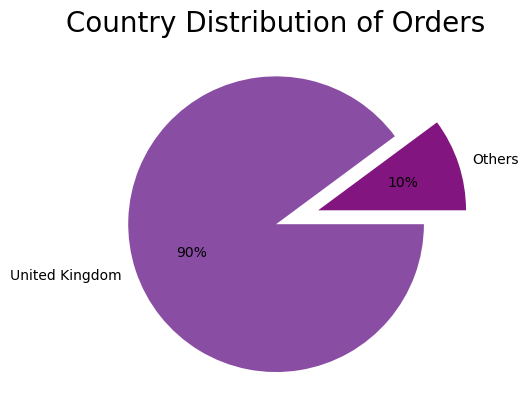

In [35]:
# creating a pie chart for proportion of country in the dataframe

#defining dataframe of countries
df_pie = df['Country'].value_counts().reset_index()
df_pie['Country'] = df_pie.apply(lambda row: 'Others' if row['count'] < 50000 else row['Country'], axis=1)
df_pie = df_pie.groupby('Country')['count'].sum().reset_index()
df_pie
# define Seaborn color palette to use 
palette_color = sns.color_palette('BuPu_r')

# plotting data on chart 
plt.pie(df_pie['count'], labels=df_pie['Country'], explode = [0.3,0], colors=palette_color, autopct='%.0f%%')

# Customize the plot
plt.title('Country Distribution of Orders', fontsize = 20)

# displaying chart 
plt.show() 

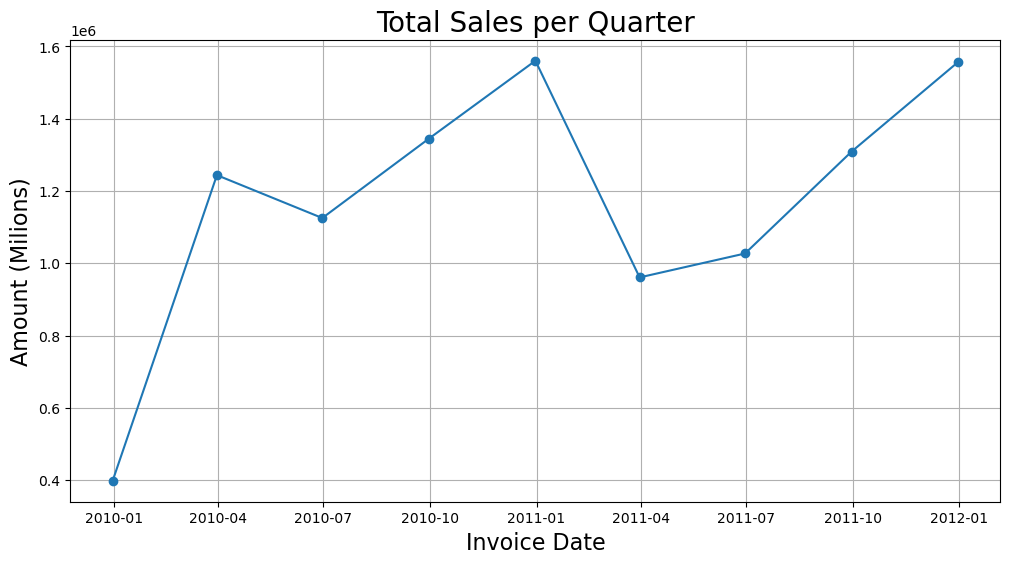

In [72]:
# copying the dataframe into a second dataframe for lineplot visualization
df2 =df.copy()

# Set InvoiceDate as the index
df2.set_index('InvoiceDate', inplace=True)

# Resample the data by quarter and sum the quantities
quarterly_data = df2['Quantity'].resample('Q').sum()

# Plot the line chart
plt.figure(figsize=(12, 6))
plt.plot(quarterly_data.index, quarterly_data, marker='o', linestyle='-')
plt.title('Total Sales per Quarter', fontsize=20)
plt.xlabel('Invoice Date', fontsize = 16)
plt.ylabel('Amount (Milions)', fontsize = 16)
plt.grid(True)
plt.show()

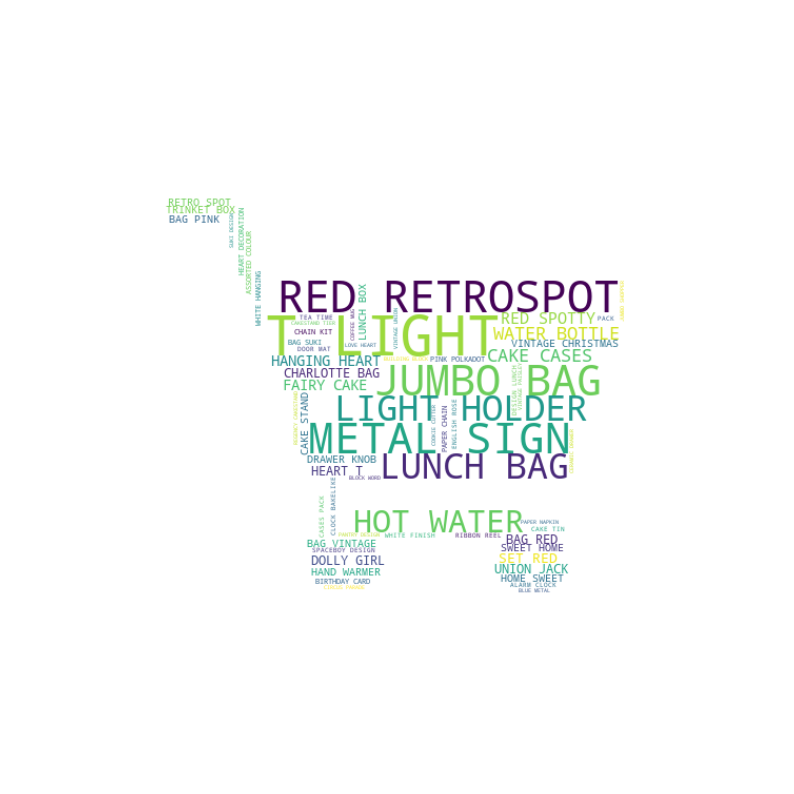

In [71]:
# word cloud eda

#instantiate the plot
fig = plt.figure()
fig.set_figwidth(10) # set width
fig.set_figheight(12) # set height

shopping_cart = np.array(Image.open('shopping-cart.png'))

# set the stopwords
stopwords = set(STOPWORDS)

# instantiate a string object of the product description column
desc = df['Description'].to_string()

# instantiate a word cloud object
product_desc = WordCloud(
    background_color='white',
    mask=shopping_cart,
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
product_desc.generate(desc)

# display the word cloud
plt.imshow(product_desc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [14]:
# filter to only inlude orders from The U.K.
df = df[df['Country']=='United Kingdom']
df['Country'].unique()

array(['United Kingdom'], dtype=object)

In [15]:
reference_date = df['InvoiceDate'].max() + dt.timedelta(days=1)

## 2. Calculate RFM Metrics

### Recency:
Recency represents how recently a customer made a purchase. It is calculated by taking the difference between the current reference date (which is the latest transaction date in the dataset) and the most recent transaction date for each customer.

### Frequency:
Frequency measures how often a customer makes purchases. It is calculated by counting the number of transactions made by each customer.

### Monetary:
Monetary represents the total amount spent by a customer. It is calculated by summing the transaction amounts for each customer.

At this stage, we group the dataset by `Customer ID` and calculate the Recency, Frequency, and Monetary values for each customer.


In [16]:
# Aggregate the data with descriptive column names
rfm_df = df.groupby('Customer ID').agg(
    Last_Purchase_Date=('InvoiceDate', 'max'),  # Get the date of the most recent transaction
    Frequency=('InvoiceDate', 'count'),         # Count the total number of transactions
    Monetary=('Price', 'sum')            # Sum the total amount spent
).reset_index()

# Calculate Recency as the number of days between the reference date and the last purchase date
rfm_df['Recency'] = (reference_date - rfm_df['Last_Purchase_Date']).dt.days

# # Reorder columns to have Recency in the correct place
rfm_df = rfm_df[['Customer ID', 'Recency', 'Frequency', 'Monetary']]

rfm_df.head()

,Customer ID,Recency,Frequency,Monetary
0,12346,326,34,207.40
1,12608,405,16,26.04
2,12745,487,22,67.98
3,12746,541,17,59.10
4,12747,2,249,1092.72


## 3. RFM Scoring

Once we have the RFM metrics, we assign a score between 1 and 5 for each metric. The scores are based on quintiles:
- **Recency**: Lower recency (more recent purchase) gets a higher score.
- **Frequency**: Higher frequency (more purchases) gets a higher score.
- **Monetary**: Higher monetary value (more money spent) gets a higher score.

These scores are then combined to create an RFM score for each customer.

In [17]:
rfm_df['R_Score'] = pd.qcut(rfm_df['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm_df['F_Score'] = pd.qcut(rfm_df['Frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
rfm_df['M_Score'] = pd.qcut(rfm_df['Monetary'], 5, labels=[1, 2, 3, 4, 5])

In [18]:
rfm_df

,Customer ID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score
0,12346,326,34,207.40,2,2,3
1,12608,405,16,26.04,2,1,1
2,12745,487,22,67.98,1,2,2
3,12746,541,17,59.10,1,2,2
4,12747,2,249,1092.72,5,5,5
...,...,...,...,...,...,...,...
5348,18283,4,938,1651.60,5,5,5
5349,18284,432,28,91.09,1,2,2
5350,18285,661,12,100.20,1,1,2
5351,18286,477,67,286.30,1,3,4


## 4. Combine RFM Scores


The next step involves combining the Recency, Frequency, and Monetary scores into a single RFM score. This score is generated by concatenating the Recency, Frequency, and Monetary scores for each customer. The resulting RFM score gives a comprehensive view of a customer’s behavior in terms of their engagement and value.

In [19]:
rfm_df['RFM_Score'] = rfm_df.R_Score.astype(str) + rfm_df.F_Score.astype(str) + rfm_df.M_Score.astype(str)

rfm_df

,Customer ID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,12346,326,34,207.40,2,2,3,223
1,12608,405,16,26.04,2,1,1,211
2,12745,487,22,67.98,1,2,2,122
3,12746,541,17,59.10,1,2,2,122
4,12747,2,249,1092.72,5,5,5,555
...,...,...,...,...,...,...,...,...
5348,18283,4,938,1651.60,5,5,5,555
5349,18284,432,28,91.09,1,2,2,122
5350,18285,661,12,100.20,1,1,2,112
5351,18286,477,67,286.30,1,3,4,134


## 5. RFM Segmentation

In this step, we use combined RFM scores to segment customers into various groups. Each segment represents different customer behaviors based on recency, frequency, and monetary value.

Here are the common segments used in RFM analysis:

- **Hibernating**: Customers who have not made a purchase in a long time, with low frequency and monetary value.
- **At Risk**:  Previously active customers who have not made a purchase for a while, indicating potential churn or loss.
- **Cannot Lose Them**: Customers with high monetary value but low purchase frequency and who have not made a purchase for a long time, requiring special attention to prevent loss.
- **About to Sleep**: Customers with moderate recency and frequency who might stop transacting if not reactivated.
- **Need Attention**: Customers with good potential who need more attention and engagement to boost their activity.
- **Promising**: New customers who have the potential to become loyal or high-value customers.
- **Champion**: Top customers who purchase frequently, have made a recent purchase, and have high spending.
- **Loyal Customer**: Loyal customers who purchase frequently and have high monetary value.
- **Potential Loyalist**: Customers who are almost loyal but not fully, possibly with high frequency but still medium monetary value.
- **New Customers**: Customers who have just made a purchase and may still be exploring the product or brand.
- **Lost**: Customers who have not purchased in a long time, with low frequency and monetary value, and are likely to be lost or churn.

In [20]:
# Create customer segments based on RFM score
Champion = [555, 554, 544, 545, 454, 455, 445]
Loyal_Customer = [543, 444, 435, 355, 354, 345, 344, 335]
Potential_Loyalist = [553, 551, 552, 541, 542, 533, 532, 531, 452, 451, 442, 441, 431, 453, 433, 432, 423, 353, 352, 351, 342, 341, 333, 323]
New_Customer = [512, 511, 422, 421, 412, 411, 311]
Promising = [525, 524, 523, 522, 521, 515, 514, 513, 425,424, 413,414,415, 315, 314, 313]
Need_Attention = [535, 534, 443, 434, 343, 334, 325, 324]
Cannot_Lose_Them = [155, 154, 144, 214,215,115, 114, 113]
About_to_Sleep = [331, 321, 312, 221, 213]
At_Risk = [255, 254, 245, 244, 253, 252, 243, 242, 235, 234, 225, 224, 153, 152, 145, 143, 142, 135, 134, 133, 125, 124]
Hibernating = [332, 322, 231, 241, 251, 233, 232, 223, 222, 132, 123, 122, 212, 211]
Lost = [111, 112, 121, 131, 141, 151]

# Create a function to assign customers to various customer segments based on RFM score
def assign_cust_seg(col):
    list_col = list(col)
    segment = list()
    for score in list_col:
        if score in Champion:
            value = 'Champion'
        elif score in Loyal_Customer:
            value = 'Loyal Customer'
        elif score in Potential_Loyalist:
            value = 'Potential Loyalist'
        elif score in New_Customer:
            value = 'New Customer'
        elif score in Promising:
            value = 'Promising'
        elif score in Need_Attention:
            value = 'Need Attention'
        elif score in Cannot_Lose_Them:
            value = 'Cannot Lose Them'
        elif score in About_to_Sleep:
            value = 'About to Sleep'
        elif score in At_Risk:
            value = 'At Risk'
        elif score in Hibernating:
            value = 'Hibernating'
        elif score in Lost:
            value = 'Lost'
        else:
            value = 'null'
        segment.append(value)
    return segment

# Assign customers to segments based on their RFM score
rfm_df['Customer Segment'] = assign_cust_seg(rfm_df['RFM_Score'].astype(int))
rfm_df.head(5)

,Customer ID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Customer Segment
0,12346,326,34,207.40,2,2,3,223,Hibernating
1,12608,405,16,26.04,2,1,1,211,Hibernating
2,12745,487,22,67.98,1,2,2,122,Hibernating
3,12746,541,17,59.10,1,2,2,122,Hibernating
4,12747,2,249,1092.72,5,5,5,555,Champion


In [21]:
pd.DataFrame(rfm_df['Customer Segment'].value_counts())

,count
Customer Segment,
Hibernating,1185
Champion,1058
Loyal Customer,593
Potential Loyalist,520
Lost,486
At Risk,476
New Customer,456
Need Attention,241
Promising,118


## 6. Analyze the Segments

Once customers are segmented, we analyze each segment to understand their behavior:
- **Recency**: How recently customers in each segment have purchased.
- **Frequency**: How often customers in each segment make purchases.
- **Monetary**: How much customers in each segment spend.

This analysis provides insights into which customer groups need more attention and which are high-value, helping businesses tailor their marketing strategies.

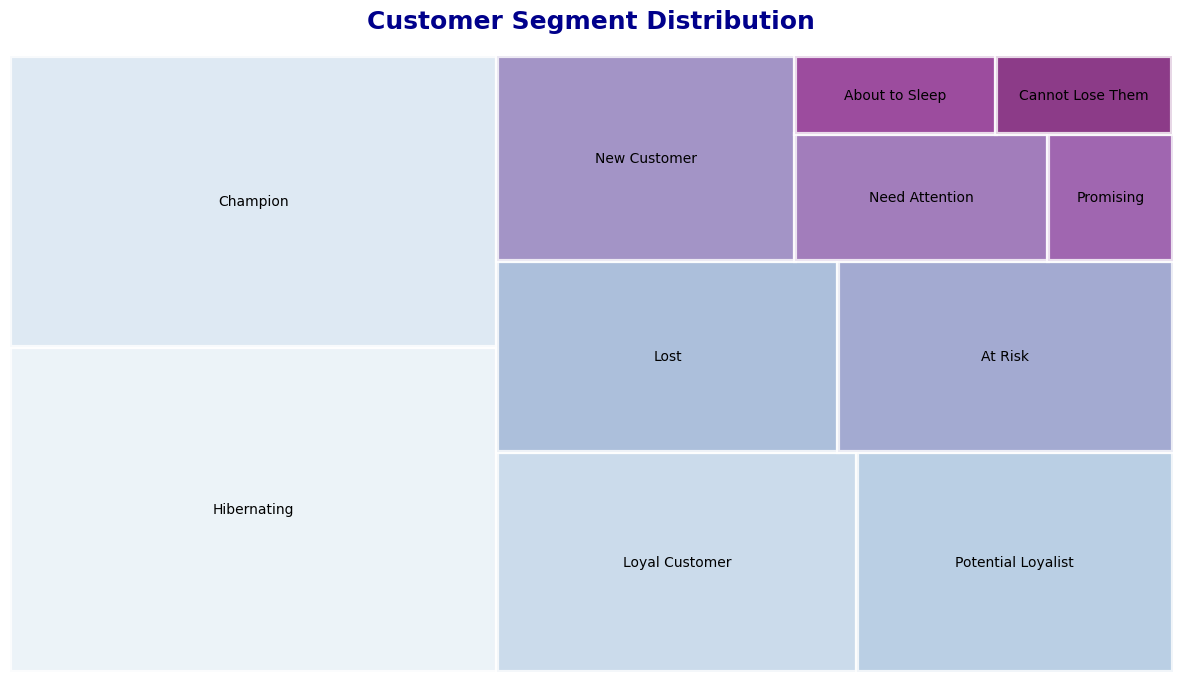

In [22]:
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

segment_counts = rfm_df['Customer Segment'].value_counts().reset_index()
segment_counts.columns = ['Customer Segment', 'count']

colors = sns.color_palette('BuPu', len(segment_counts))

plt.figure(figsize=(15, 8))
squarify.plot(
    sizes=segment_counts['count'],
    label=segment_counts['Customer Segment'],
    color=colors,
    alpha=0.8,
    edgecolor='white',
    linewidth=3
)

plt.axis('off')

plt.title(
    'Customer Segment Distribution',
    fontsize=18,
    fontweight='bold',
    color='darkblue',
    pad=20
)

# Display the plot
plt.show()

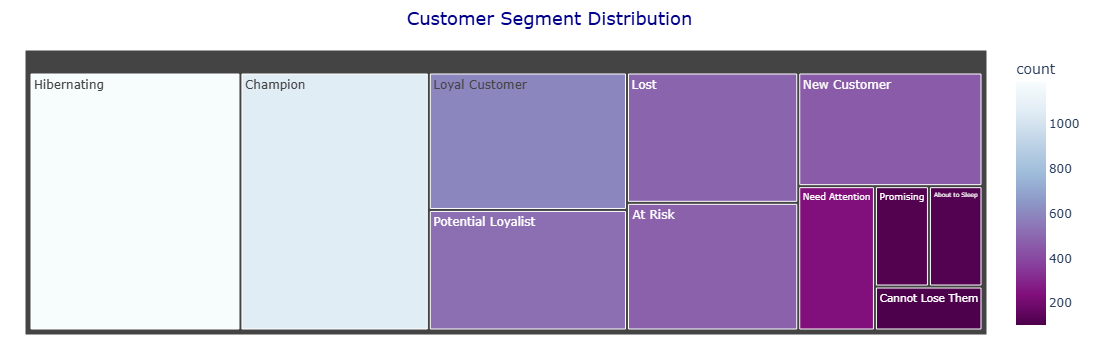

In [55]:
# Using rfm_df as the DataFrame containing the RFM analysis results
segment_counts = rfm_df['Customer Segment'].value_counts().reset_index()
segment_counts.columns = ['Customer Segment', 'count']

# Create an interactive treemap plot
fig = px.treemap(
    segment_counts,
    path=['Customer Segment'],
    values='count',
    color='count',
    color_continuous_scale='BuPu_r',
    title='Customer Segment Distribution'
)

# Update the layout for better visualization
fig.update_layout(
    title_font_size=18,
    title_font_color='darkblue',
    title_x=0.5,
    margin=dict(t=50, l=25, r=25, b=25)
)

# Display the plot
fig.show()

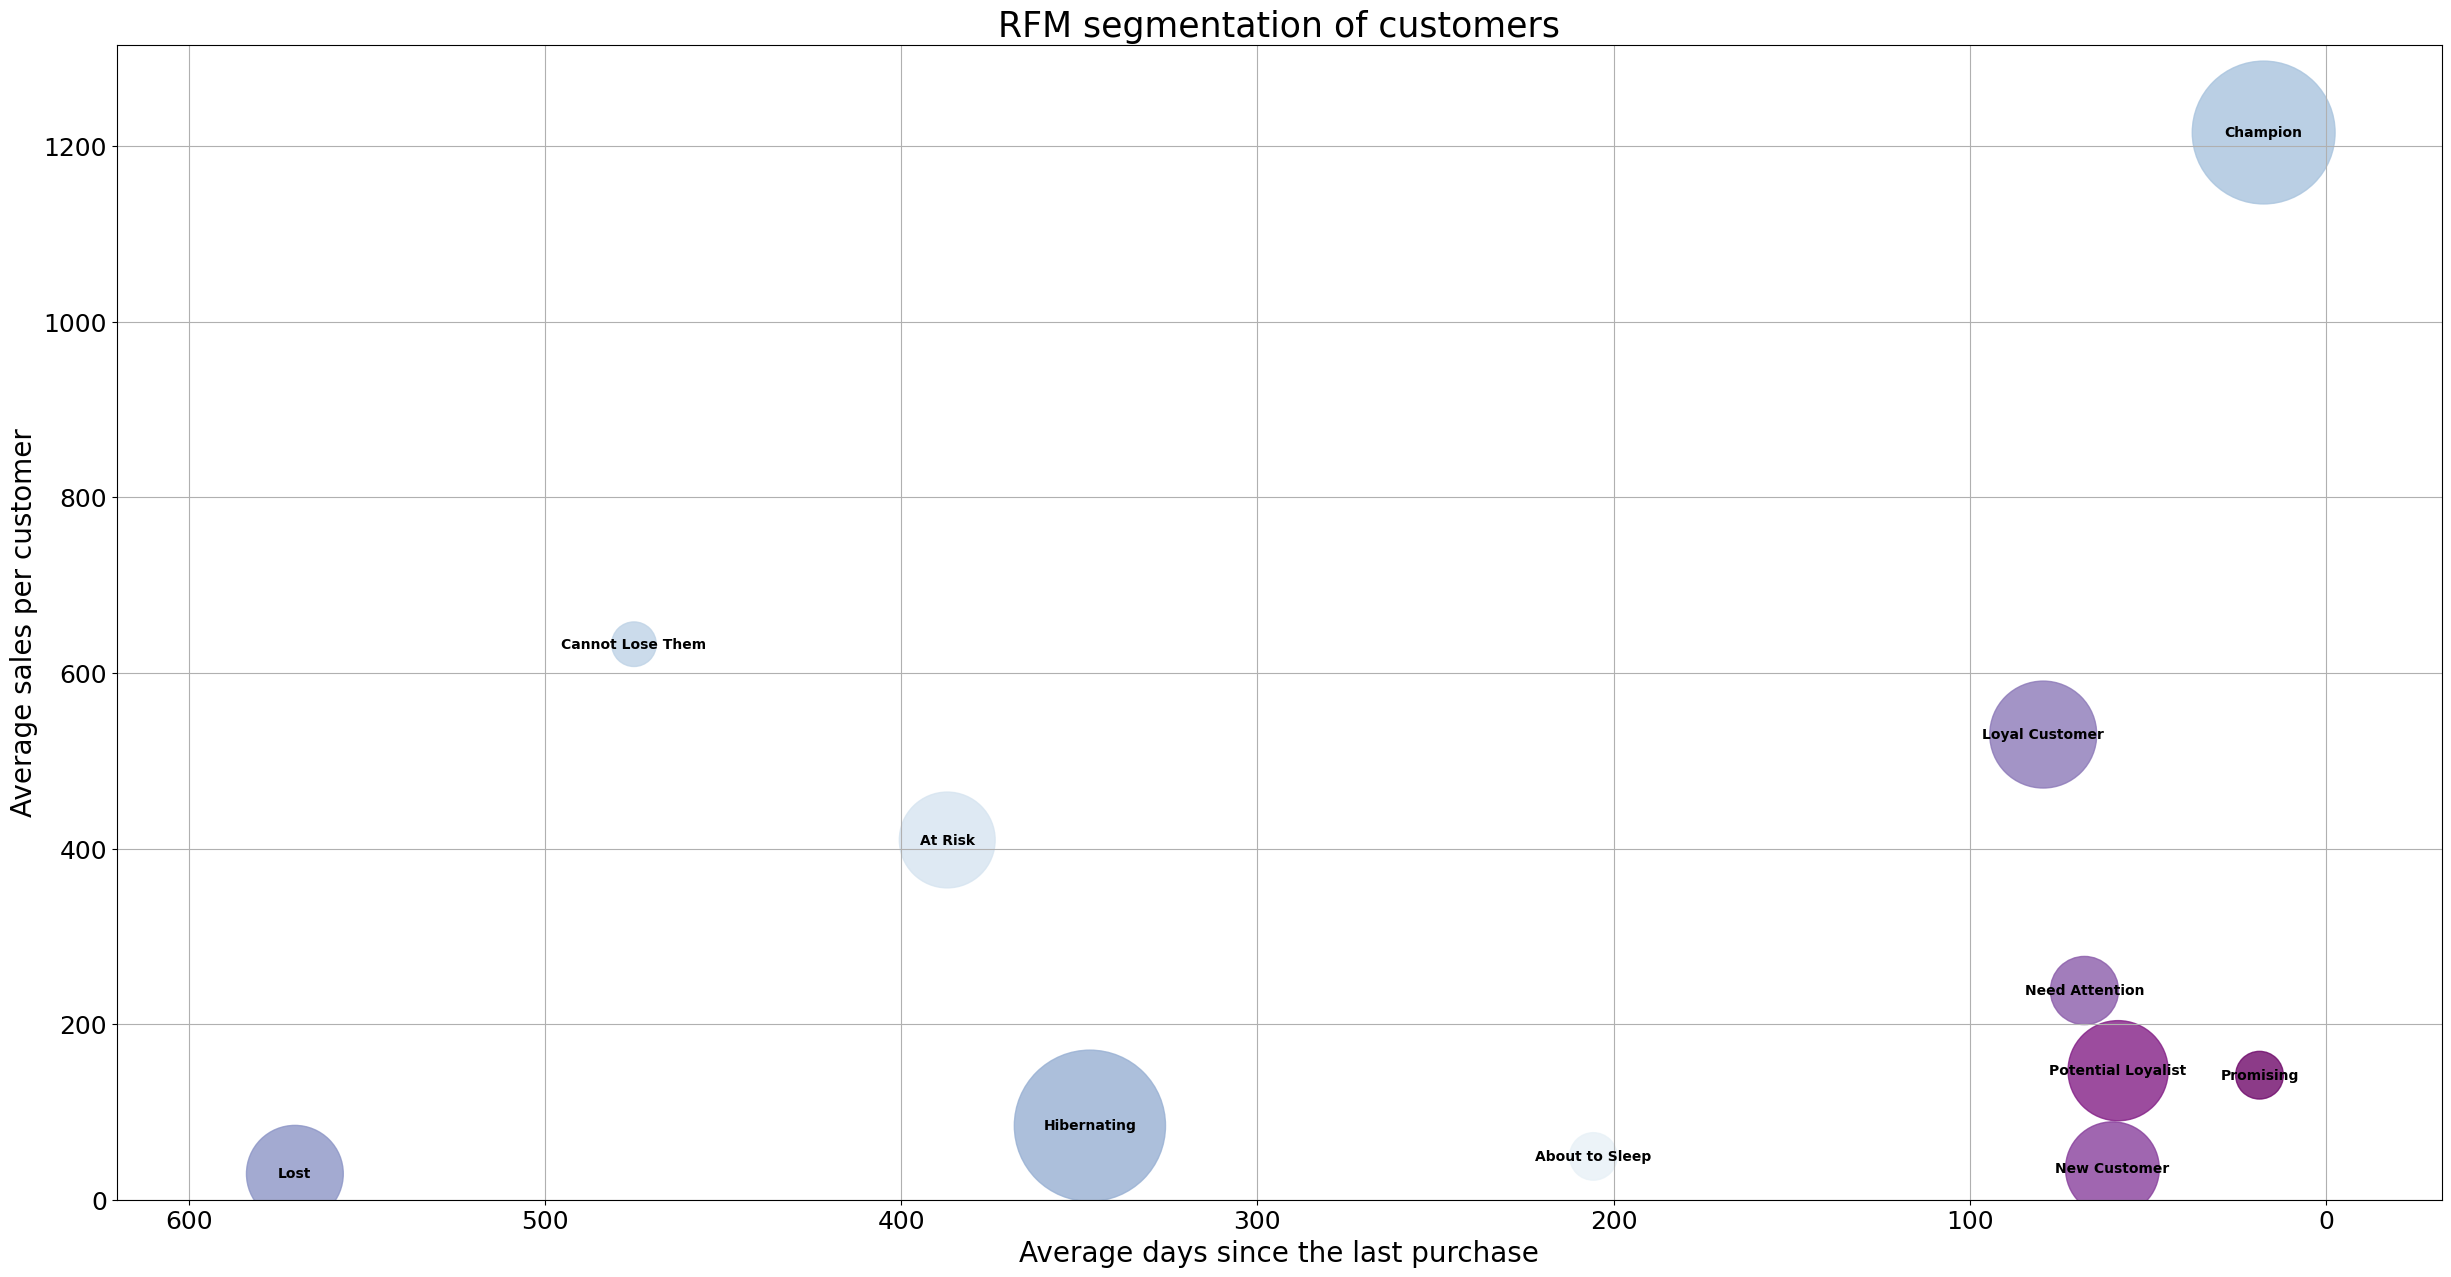

In [23]:
segment_summary = rfm_df.groupby('Customer Segment').agg(
    avg_days_since_purchase=('Recency', 'mean'),
    avg_sales_per_customer=('Monetary', 'mean'),
    customer_count=('Customer ID', 'count')
).reset_index()

plt.figure(figsize=(30, 15))
scatter = plt.scatter(
    segment_summary['avg_days_since_purchase'],
    segment_summary['avg_sales_per_customer'],
    s=segment_summary['customer_count'] * 10,
    c=sns.color_palette('BuPu', len(segment_summary)),
    alpha=0.8
)

# Labeling the axes and title
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Average days since the last purchase', fontsize=20)
plt.ylabel('Average sales per customer', fontsize=20)
plt.title('RFM segmentation of customers', fontsize=25)
plt.grid(True)

for i, text in enumerate(segment_summary['Customer Segment']):
    plt.annotate(
        text,
        (segment_summary['avg_days_since_purchase'][i], segment_summary['avg_sales_per_customer'][i]),
        ha='center',
        va='center',
        weight='bold'
    )

plt.gca().invert_xaxis()

plt.xlim(segment_summary['avg_days_since_purchase'].max() + 50, segment_summary['avg_days_since_purchase'].min() - 50)
plt.ylim(0, segment_summary['avg_sales_per_customer'].max() + 100)

plt.show()


In [66]:
segment_summary[segment_summary['Customer Segment'].isin(['About to Sleep', 'At Risk'])]

,Customer Segment,avg_days_since_purchase,avg_sales_per_customer,customer_count
0,About to Sleep,205.683761,49.306496,117
1,At Risk,387.073529,409.728870,476


## Export the segmented dataset

In [25]:
rfm_df.to_csv('rfm.csv', index=False)